## Porto Seguro's Safe Driver Prediction
### Team Member: Yuqiang Wang (yuw99), Shuang Song (shs183), Zhenqiang Xu (zhx31)

In [1]:
# install the packages
!pip install pandas_profiling
!pip install missingno
!pip install imbalanced-learn

In [2]:
import warnings 
warnings.filterwarnings('ignore')
# Import libraries and check the versions
import pandas as pd
# import sys
import missingno as msno
import numpy as np
import re
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, recall_score, roc_curve, auc, precision_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# Load Dataset

In [3]:
# read the data
df_total = pd.read_csv('/Users/cariasong/Desktop/MACHINE LEARNING/project/data/train.csv')
# df_total.info()
# delete the id col
del df_total["id"]


In [4]:
# -1 value mean null value in our data set, we first turn -1 value into nan
df_total = df_total.replace(-1, np.nan)

# Display Missing Value and Graphic

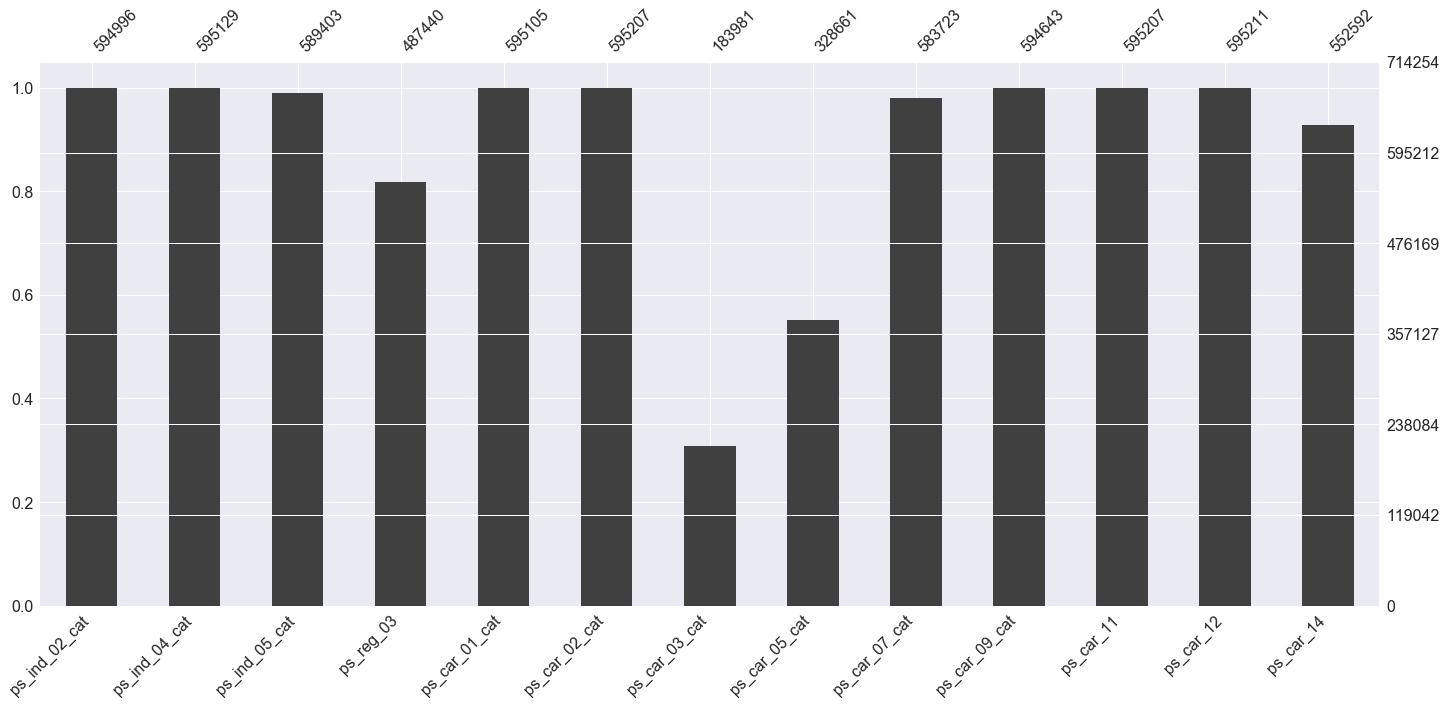

In [5]:
# contain missing value col
col_contain_missing = df_total.columns[df_total.isnull().any()]
# col_contain_missing
msno.bar(df_total[col_contain_missing])

In [6]:
col_contain_missing_list = col_contain_missing.astype(str).tolist()
# col_contain_missing_list
col_contain_missing_cat = [x for x in col_contain_missing_list if x.endswith('cat')]
col_contain_missing_notcat = [x for x in col_contain_missing_list if not x.endswith('cat')]
# col_contain_missing_notcat
# col_contain_missing_cat
# deal with missing value with col notcategory
for col in col_contain_missing_notcat:
#     m=df_total.groupby("target")[col].transform("mean")
    df_total[col].fillna(df_total.groupby("target")[col].transform("mean"), inplace = True)

# deal with missing value with col category
for col in col_contain_missing_cat:
    mode = df_total[col].mode()[0]
    df_total[col].fillna(mode, inplace=True)
    

In [7]:
col_to_drop = df_total.columns[df_total.columns.str.endswith('_cat')]
col_to_dummify = df_total.columns[df_total.columns.str.endswith('_cat')].astype(str).tolist()
# col_to_drop

In [8]:
# for col in col_to_dummify:
# #     df_total[col] = df_total[col].astype("float64")
#     print(df_total[col].dtype)
#     print(df_total[col].unique()) 

In [9]:
# imbalance dataset
y = df_total["target"] == 0
print(sum(y == True))
print(sum(y == False))

573518
21694


# Dummy variable

In [10]:
# dummy variable
for col in col_to_dummify:
    df_total[col] = df_total[col].astype("int64")   
    dummy = pd.get_dummies(df_total[col].astype('category'))
    columns = dummy.columns.astype(str).tolist()
    columns = [col + '_' + w for w in columns]
    dummy.columns = columns
    df_total = pd.concat((df_total, dummy), axis=1)

df_total.drop(col_to_dummify, axis=1, inplace=True)

In [11]:
print(df_total.shape)

(595212, 219)


In [12]:
Y = df_total["target"]
del df_total["target"]
X = df_total

In [13]:
print(Y.shape,X.shape)

(595212,) (595212, 218)


# Resampling

In [14]:
# resampling
rus = RandomUnderSampler(random_state = 7)  
X_rus, Y_rus = rus.fit_sample(X,Y)  
ros = RandomOverSampler(random_state = 7)
X_ros, Y_ros = ros.fit_sample(X,Y)

In [15]:
print("undersampling:",X_rus.shape,Y_rus.shape)
print("oversampling:",X_ros.shape,Y_ros.shape)

undersampling: (43388, 218) (43388,)
oversampling: (1147036, 218) (1147036,)


# Split Dataset & Scaler

In [16]:
# considering the time-consuming, we choose to use under-sampling to make data balance
# split data into train and test
X_train, X_test, Y_train, Y_test= train_test_split(X_rus, Y_rus, random_state= 7)

# scaling
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

# Logistic Regression not using PCA

In [22]:
# Logistic Regression not using PCA
for c in [0.01,0.1,0.5,1,5,10,100]:
    FittedLogRegModel= LogisticRegression(C=c).fit(X_train_transformed,Y_train)
    print("C:",c,"Score:",FittedLogRegModel.score(X_test_transformed,Y_test))
    PredictedOutput=FittedLogRegModel.predict(X_test_transformed)
    confusion=confusion_matrix(Y_test,PredictedOutput)
    print(confusion)
    print(precision_score(Y_test,PredictedOutput)) 
    print(recall_score(Y_test,PredictedOutput))
    print("------------finish-----------------")

C: 0.01 Score: 0.593067207523
[[3392 2050]
 [2364 3041]]
0.597328619132
0.56262719704
------------finish-----------------
C: 0.1 Score: 0.593067207523
[[3391 2051]
 [2363 3042]]
0.597290398586
0.562812210916
------------finish-----------------
C: 0.5 Score: 0.590393657232
[[3386 2056]
 [2387 3018]]
0.594797004336
0.558371877891
------------finish-----------------
C: 1 Score: 0.589656126118
[[3382 2060]
 [2391 3014]]
0.594008671659
0.557631822387
------------finish-----------------
C: 5 Score: 0.589656126118
[[3387 2055]
 [2396 3009]]
0.594194312796
0.556706753006
------------finish-----------------
C: 10 Score: 0.589840508896
[[3388 2054]
 [2395 3010]]
0.59439178515
0.556891766883
------------finish-----------------
C: 100 Score: 0.590117083064
[[3391 2051]
 [2395 3010]]
0.594744121715
0.556891766883
------------finish-----------------


# LDA & QDA not using PCA

In [23]:
# LDA & QDA not using PCA
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train_transformed,np.ravel(Y_train))
print('Accuracy using LDA is:', LDAmodelFitted.score(X_test_transformed,Y_test))
PredictedOutput=LDAmodelFitted.predict(X_test_transformed)
confusion=confusion_matrix(Y_test,PredictedOutput)
print(confusion)
print(precision_score(Y_test,PredictedOutput)) 
print(recall_score(Y_test,PredictedOutput))
print("--------------finish--------------------")

QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train_transformed,np.ravel(Y_train))
print('Accuracy using QDA is:', QDAmodelFitted.score(X_test_transformed,Y_test))
PredictedOutput=QDAmodelFitted.predict(X_test_transformed)
confusion=confusion_matrix(Y_test,PredictedOutput)
print(confusion)
print(precision_score(Y_test,PredictedOutput)) 
print(recall_score(Y_test,PredictedOutput))

Accuracy using LDA is: 0.589471743339
[[3389 2053]
 [2400 3005]]
0.594108343219
0.555966697502
--------------finish--------------------
Accuracy using QDA is: 0.520973541071
[[3740 1702]
 [3494 1911]]
0.528923332411
0.353561517114


In [24]:
# Using PCA
N_components=40 # Define the number of principle components 
Data_pca = PCA(n_components=N_components).fit(X_train_transformed)
X_train_pca = Data_pca.transform(X_train_transformed) 
X_test_pca = Data_pca.transform(X_test_transformed)
print("the shape of the training data before PCA is applied: ",X_train_transformed.shape)
print("the shape of the training data after PCA is applied: ",X_train_pca.shape)
print('Explained variance: ' , Data_pca.explained_variance_ratio_)

the shape of the training data before PCA is applied:  (32541, 218)
the shape of the training data after PCA is applied:  (32541, 40)
Explained variance:  [ 0.06644722  0.05882781  0.05288241  0.04386799  0.03685462  0.03447646
  0.03216672  0.03017751  0.02718514  0.02603947  0.02457558  0.02417905
  0.02372648  0.02156991  0.02143683  0.02118421  0.01982489  0.01858484
  0.01688056  0.01639156  0.01471764  0.01397706  0.01367472  0.01276274
  0.01135777  0.01116809  0.01079023  0.01065369  0.01060241  0.01050595
  0.00958271  0.00932091  0.00827269  0.00802109  0.00767091  0.00717614
  0.00687928  0.00645713  0.00598378  0.00570977]


# Logistic Regression using PCA

In [26]:
# Logistic Regression using PCA
for c in [0.01,0.1,0.5,1,5,10,100]:
    FittedLogRegModelpca= LogisticRegression(C=c).fit(X_train_pca,Y_train)
    print("C:",c,"Score:",FittedLogRegModelpca.score(X_test_pca,Y_test))
    PredictedOutput=FittedLogRegModelpca.predict(X_test_pca)
    confusion=confusion_matrix(Y_test,PredictedOutput)
    print(confusion)
    print(precision_score(Y_test,PredictedOutput)) 
    print(recall_score(Y_test,PredictedOutput))
    print("------------finish-----------------")

C: 0.01 Score: 0.591499953904
[[3390 2052]
 [2379 3026]]
0.595903899173
0.559851988899
------------finish-----------------
C: 0.1 Score: 0.594450078363
[[3413 2029]
 [2370 3035]]
0.599328593997
0.561517113784
------------finish-----------------
C: 0.5 Score: 0.595187609477
[[3416 2026]
 [2365 3040]]
0.600078957758
0.562442183164
------------finish-----------------
C: 1 Score: 0.595003226699
[[3415 2027]
 [2366 3039]]
0.599881563364
0.562257169288
------------finish-----------------
C: 5 Score: 0.595003226699
[[3415 2027]
 [2366 3039]]
0.599881563364
0.562257169288
------------finish-----------------
C: 10 Score: 0.595003226699
[[3415 2027]
 [2366 3039]]
0.599881563364
0.562257169288
------------finish-----------------
C: 100 Score: 0.595003226699
[[3415 2027]
 [2366 3039]]
0.599881563364
0.562257169288
------------finish-----------------


# LDA & QDA using PCA

In [28]:
# LDA & QDA using PCA
LDAmodelFittedpca = LinearDiscriminantAnalysis().fit(X_train_pca,np.ravel(Y_train))
print('Accuracy using LDA is:', LDAmodelFittedpca.score(X_test_pca,Y_test))
PredictedOutput=LDAmodelFittedpca.predict(X_test_pca)
confusion=confusion_matrix(Y_test,PredictedOutput)
print(confusion)
print(precision_score(Y_test,PredictedOutput)) 
print(recall_score(Y_test,PredictedOutput))
print("-----------finsih---------------")

QDAmodelFittedpca = QuadraticDiscriminantAnalysis().fit(X_train_pca,np.ravel(Y_train))
print('Accuracy using QDA is:', QDAmodelFittedpca.score(X_test_pca,Y_test))
PredictedOutput=QDAmodelFittedpca.predict(X_test_pca)
confusion=confusion_matrix(Y_test,PredictedOutput)
print(confusion)
print(precision_score(Y_test,PredictedOutput)) 
print(recall_score(Y_test,PredictedOutput))

Accuracy using LDA is: 0.594911035309
[[3434 2008]
 [2386 3019]]
0.600556992242
0.558556891767
-----------finsih---------------
Accuracy using QDA is: 0.582373006361
[[3591 1851]
 [2679 2726]]
0.595586628796
0.504347826087


# Neural Networks

In [37]:
# Neural Networks
# over-sampling
X_train1, X_test1, Y_train1, Y_test1= train_test_split(X_ros, Y_ros, random_state= 7)

# scaling
scaler=preprocessing.MinMaxScaler().fit(X_train1)
X_train_transformed1=scaler.transform(X_train1)
X_test_transformed1=scaler.transform(X_test1)

mlpClassifier = MLPClassifier(solver='lbfgs',  activation='relu
                              ', random_state=7, hidden_layer_sizes=[100,100],
                               alpha=0.5).fit(X_train_transformed1, Y_train1)
print("Accuracy of neural network with two hidden layers of [100,100] units, \
solved with L-BFGS optimization, random_state=7 is:", mlpClassifier.score(X_test_transformed1,Y_test1))
PredictedOutput=mlpClassifier.predict(X_test_transformed1)
confusion=confusion_matrix(Y_test1,PredictedOutput)
print(confusion)
print(precision_score(Y_test1,PredictedOutput)) 
print(recall_score(Y_test1,PredictedOutput))

Accuracy of neural network with two hidden layers of [100,100] units, solved with L-BFGS optimization, random_state=7 is: 0.613428000516
[[85506 57455]
 [53398 90400]]
0.611409827196
0.628659647561


# AdaBoost

In [31]:
# ## Tunning
# best_score = 0
# kfolds = 5
# i = np.arange(100, 300, 100)
# for c in [1, 2, 3]:
#     for G in i:
#         adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=c), algorithm='SAMME',
#             n_estimators=G, random_state=seed)
#         scores = cross_val_score(adaboost, X_train, y_train, cv=kfolds)
#         score = np.mean(scores)
#         print(c,G,score)
#         if score > best_score:
#             best_score = score
#             best_c = c
#             best_g = G

adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    algorithm='SAMME',
    n_estimators=200,
    random_state=3211)

# train classifier
adaboost.fit(X_train_transformed, Y_train)

# calculate predictions
adaboost_y_pred = adaboost.predict(X_test_transformed)
adaboost_y_pred_prob = adaboost.predict_proba(X_test_transformed)

# evaluate
adaboost_accuracy = accuracy_score(Y_test, adaboost_y_pred)
adaboost_logloss = log_loss(Y_test, adaboost_y_pred_prob)

print("== AdaBoost ==")
print("Accuracy: {0:.2f}".format(adaboost_accuracy))
print("Log loss: {0:.2f}".format(adaboost_logloss))

== AdaBoost ==
Accuracy: 0.67
Log loss: 0.67


In [34]:
# confusion matrix
confusion_matrix(Y_test, adaboost_y_pred)

# Recall, Precision
print("Recall score: ", recall_score(Y_test, adaboost_y_pred))
print("Precision score: ", precision_score(Y_test, adaboost_y_pred))

Recall score:  0.656984273821
Precision score:  0.679357183853


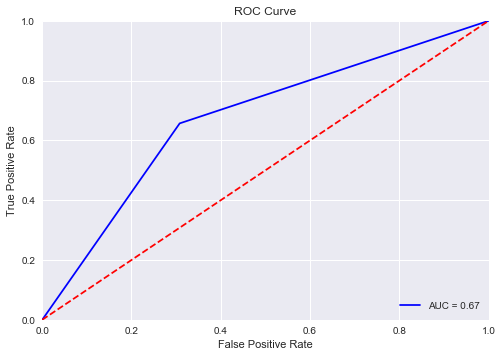

In [44]:
fpr, tpr, threshold = roc_curve(Y_test, adaboost_y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

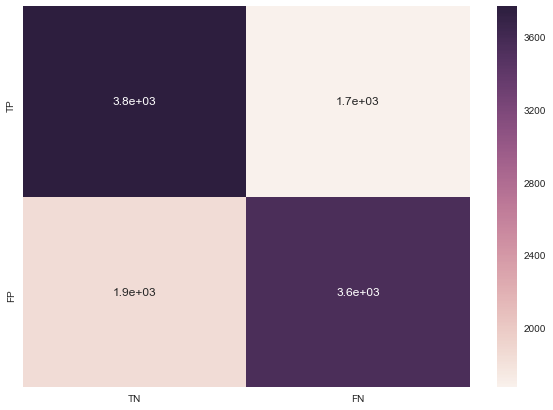

In [46]:
array = confusion_matrix(Y_test, adaboost_y_pred)
xx = ["TP", "FP"]
yy = ["TN", "FN"]
df_cm = pd.DataFrame(array, index = [i for i in xx],
                  columns = [i for i in yy])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

# SVM

In [ ]:
svmModel=SVC(kernel="rbf", C=1)
svm = svmModel.fit(X_train_transformed, Y_train)

# calculate predictions
svm_y_pred = svm.predict(X_test_transformed)


# evaluate
svm_accuracy = accuracy_score(Y_test, svm_y_pred)


print("== SVM ==")
print("Accuracy: {0:.2f}".format(svm_accuracy))

In [ ]:
# confusion matrix
confusion_matrix(Y_test, svm_y_pred)

In [ ]:
print("Recall score: ", recall_score(Y_test, svm_y_pred))
print("Precision score: ", precision_score(Y_test, svm_y_pred))

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test, svm_y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN

In [ ]:
#cross-validation - find the best model fit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
best_score = 0
best_k = 0
range_array = [5,10,100,200,300,350,400,450,500]
metrics_df = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall'], columns = [1,2,3,4,5,6,7,8,9])
i = 1

for k in range_array:
    print("MODEL ", i)
    knnModel = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knnModel, X_train_transformed, Y_train, cv = 5)
    
    score = scores.mean()    # accuracy
    print("Accuracy is: ", score)
    metrics_df[i]['Accuracy'] = score
    
    prediction = knnModel.fit(X_train_transformed, Y_train).predict(X_test_trainsformed)
    confusion = confusion_matrix(Y_test, prediction)    # confusion matrix - precision and recall
    print("Precision is: ", precision_score(Y_test, prediction))
    metrics_df[i]['Precision'] = precision_score(Y_test, prediction)
    print("Recall is: ", recall_score(Y_test, prediction))
    metrics_df[i]['Recall'] = recall_score(Y_test, prediction)
    
    if score > best_score:
        best_score = score
        best_k = k
    
    i = i + 1
    print()

print("Metrics dataframe is:")
print(metrics_df)
print("Best k is: ", best_k)

In [ ]:
import matplotlib.pyplot as plt
metrics_df.columns = [str(x) for x in metrics_df.columns] # convert year numerical values to str
metrics_df.T.plot(marker = 'o')
plt.title('KNN Performance')
plt.show()

In [20]:
# fit in the best model
best_k = 300
selectedModel = KNeighborsClassifier(n_neighbors = best_k)
fittedModel = selectedModel.fit(X_train_transformed, Y_train)
prediction = fittedModel.predict(X_test_transformed)
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [21]:
# Calculate model accuracy
accuracy = fittedModel.score(X_test_transformed, Y_test)
print(accuracy)

0.567991149627


In [22]:
# Evaluation of the result - recall and precision
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion = confusion_matrix(Y_test, prediction)
print("Precision of the selected model is: ", precision_score(Y_test, prediction))
print("Recall of the selected model is: ", recall_score(Y_test, prediction))
print(confusion)

Precision of the selected model is:  0.618295491938
Recall of the selected model is:  0.34764107308
[[4282 1160]
 [3526 1879]]


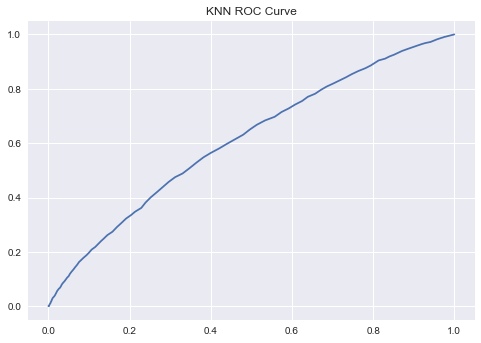

In [23]:
from sklearn import metrics
Y_probs = fittedModel.predict_proba(X_test_transformed)
Y_preds = Y_probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_preds)

plt.figure()
plt.title('KNN ROC Curve')
plt.plot(fpr, tpr)
plt.show()

# Random Forest

In [25]:
# cross-validation: find the best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

best_score = 0
best_m = 0
range_array = [50,100,200,300,500,700,1000]
performance_array = []
metrics_df = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall'], columns = [1,2,3,4,5,6,7])
i = 1

for m in range_array:
    # for classification, the best max_features is sqrt(# of features)
    print("MODEL ", i)
    randomForestModel = RandomForestClassifier(n_estimators = m, max_features = 7, random_state = 0)
    scores = cross_val_score(randomForestModel, X_train_transformed, Y_train, cv = 5)
    
    score = scores.mean()    # accuracy
    print("Accuracy is: ", score)
    metrics_df[i]['Accuracy'] = score
    performance_array.append(score)
    
    prediction = randomForestModel.fit(X_train_transformed, Y_train).predict(X_test_transformed)
    confusion = confusion_matrix(Y_test, prediction)    # confusion matrix - precision and recall
    print("Precision is: ", precision_score(Y_test, prediction))
    metrics_df[i]['Precision'] = precision_score(Y_test, prediction)
    print("Recall is: ", recall_score(Y_test, prediction))
    metrics_df[i]['Recall'] = recall_score(Y_test, prediction)
          
    if score > best_score:
        best_score = score
        best_m = m
    
    i = i + 1
    print()

print("Metrics dataframe is:")
print(metrics_df)
print("The accuracies for all models are: ", performance_array)
print("Best 'n_estimator' is: ", best_m)

MODEL  1
Accuracy is:  0.641990246414
Precision is:  0.65719844358
Recall is:  0.624976873265

MODEL  2
Accuracy is:  0.652223658823
Precision is:  0.658591975776
Recall is:  0.643848288622

MODEL  3
Accuracy is:  0.6558189408
Precision is:  0.661808118081
Recall is:  0.663644773358

MODEL  4
Accuracy is:  0.657509121021
Precision is:  0.662502296528
Recall is:  0.667160037003

MODEL  5
Accuracy is:  0.659445086372
Precision is:  0.664467656221
Recall is:  0.670860314524

MODEL  6
Accuracy is:  0.659752239902
Precision is:  0.665691294806
Recall is:  0.673450508788

MODEL  7
Accuracy is:  0.660766362198
Precision is:  0.667278399706
Recall is:  0.672710453284

Metrics dataframe is:
                  1         2         3         4         5         6  \
Accuracy    0.64199  0.652224  0.655819  0.657509  0.659445  0.659752   
Precision  0.657198  0.658592  0.661808  0.662502  0.664468  0.665691   
Recall     0.624977  0.643848  0.663645   0.66716   0.67086  0.673451   

                

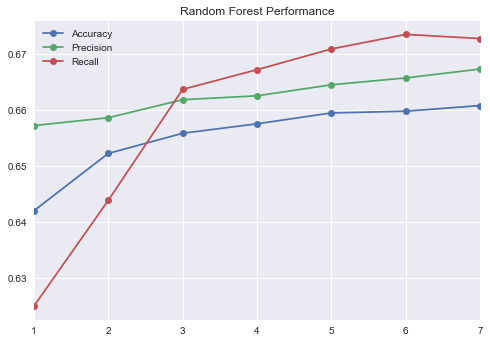

In [30]:
# performance plot
import matplotlib.pyplot as plt
metrics_df.columns = [str(x) for x in metrics_df.columns] # convert year numerical values to str
metrics_df.T.plot(marker = 'o')
plt.title('Random Forest Performance')
plt.show()

In [27]:
# fit in the best model and calculate accuracy
best_m = 1000
selectedModel = RandomForestClassifier(n_estimators = best_m, random_state = 0)
fittedModel = selectedModel.fit(X_train_transformed, Y_train)
prediction = fittedModel.predict(X_test_transformed)
prediction

array([0, 0, 1, ..., 1, 1, 0])

In [28]:
# Calculate the accuracy
accuracy = fittedModel.score(X_test_transformed, Y_test)
print(accuracy)

0.6753019268


In [29]:
# Evaluation of the result - recall and precision
confusion = confusion_matrix(Y_test, prediction)
print(confusion)
print("Precision of the selected model is: ", precision_score(Y_test, prediction))
print("Recall of the selected model is: ", recall_score(Y_test, prediction))

[[3651 1791]
 [1731 3674]]
Precision of the selected model is:  0.672278133577
Recall of the selected model is:  0.679740980574


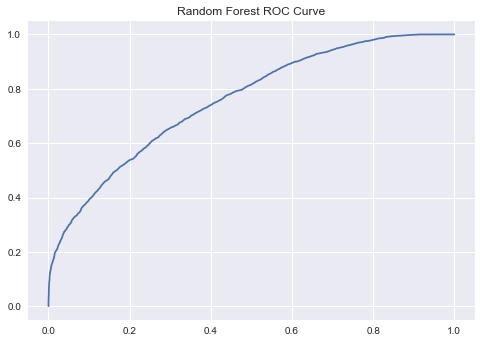

In [32]:
# ROC Curve
from sklearn import metrics
Y_probs = fittedModel.predict_proba(X_test_transformed)
Y_preds = Y_probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_preds)

plt.figure()
plt.title('Random Forest ROC Curve')
plt.plot(fpr, tpr)
plt.show()